In [1]:
import numpy as np
import pandas as pd

import time
import os

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

sns.set_style('darkgrid')

In [2]:
hotel = pd.read_csv('Hotel Reservations.csv')

In [3]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [4]:
hotel.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [5]:
print(hotel.shape)
print(hotel.columns)

(36275, 19)
Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')


In [6]:
hotel.isna().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

## Pre Processing

In [7]:
le = LabelEncoder()
scaler = StandardScaler()

In [8]:
print(hotel['type_of_meal_plan'].unique())
print(hotel['room_type_reserved'].unique())
print(hotel['market_segment_type'].unique())
print(hotel['booking_status'].unique())

hotel['type_of_meal_plan'] = le.fit_transform(hotel['type_of_meal_plan'])
hotel['room_type_reserved'] = le.fit_transform(hotel['room_type_reserved'])
hotel['market_segment_type'] = le.fit_transform(hotel['market_segment_type'])
hotel['booking_status'] = le.fit_transform(hotel['booking_status'])
print('----------------------')
print(hotel['type_of_meal_plan'].unique())
print(hotel['room_type_reserved'].unique())
print(hotel['market_segment_type'].unique())
print(hotel['booking_status'].unique())

['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']
['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']
['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']
['Not_Canceled' 'Canceled']
----------------------
[0 3 1 2]
[0 3 1 5 4 6 2]
[3 4 2 0 1]
[1 0]


In [9]:
hotel = hotel.drop('Booking_ID', axis=1)

<Axes: >

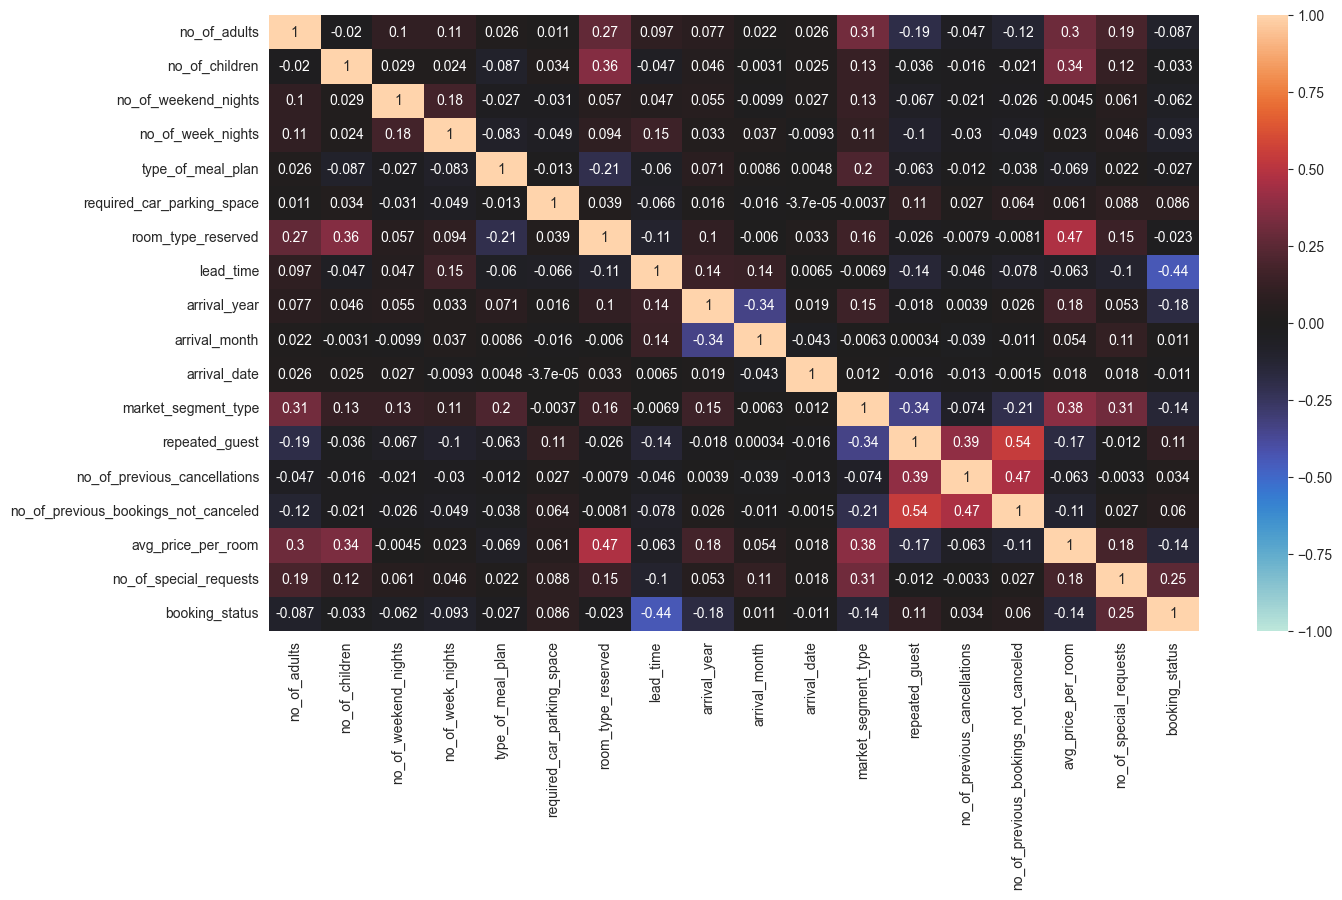

In [10]:
corr = hotel.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(corr, vmin=-1, vmax=1, center=0, annot=True)

<Figure size 1200x1100 with 0 Axes>

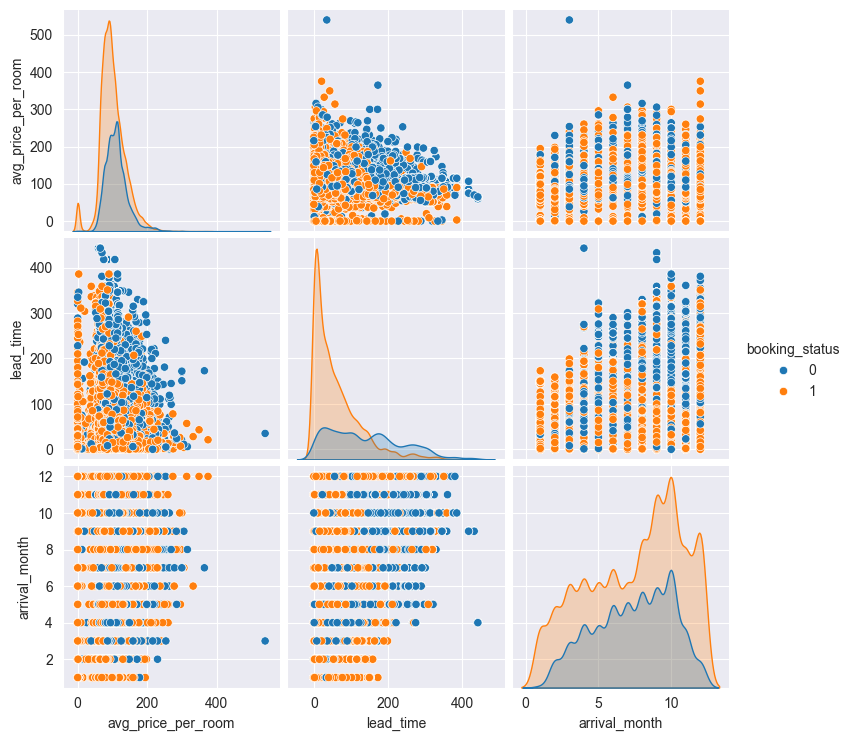

In [11]:
plt.figure(figsize=(12,11))
sns.pairplot(hotel[['avg_price_per_room', 'lead_time', 'arrival_month', 'booking_status']], hue='booking_status')

<Axes: xlabel='booking_status'>

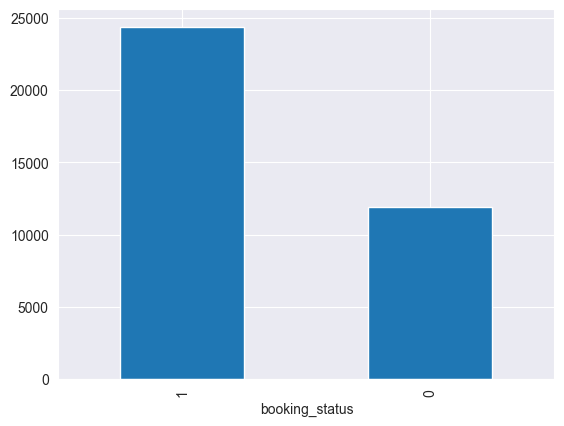

In [12]:
hotel['booking_status'].value_counts().plot(kind='bar')

## Data Preparation

In [13]:
X = hotel.drop('booking_status', axis=1).to_numpy()
y = hotel['booking_status'].to_numpy()

X = scaler.fit_transform(X)

In [14]:
from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

for train_index, test_index in skf.split(X, y): 
    X_train, X_test = X[train_index], X[test_index] 
    y_train, y_test = y[train_index], y[test_index]

## Models Training

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics

In [16]:
def train_model(model, X_train, X_test, y_train):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    return y_pred

In [17]:
def val_model(y_pred, y_test):
    print('Acc:', metrics.accuracy_score(y_test, y_pred)*100)
    print('F1:', metrics.f1_score(y_test, y_pred)*100)
    print('Recall:', metrics.recall_score(y_test, y_pred)*100)
    print('Precision:', metrics.precision_score(y_test, y_pred)*100)
    print('Confusion Matrix:\n') 
    sns.heatmap(metrics.confusion_matrix(y_pred, y_test), annot=True, fmt='g');

## 1) Decision Trees

Acc: 87.34491315136476
F1: 90.58461538461539
Recall: 90.52890528905289
Precision: 90.64039408866995
Confusion Matrix:



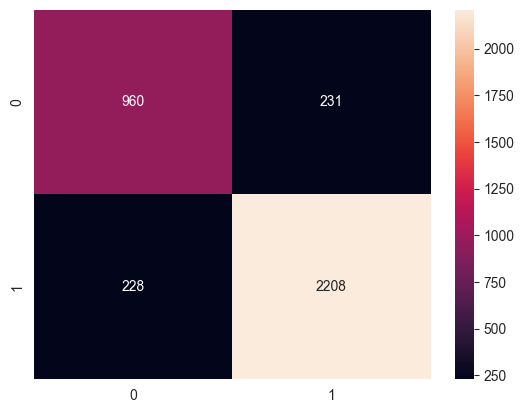

In [18]:
model = DecisionTreeClassifier(random_state=10)
y_pred = train_model(model, X_train, X_test, y_train)
val_model(y_pred, y_test)

## 2) Random Forest

Acc: 90.65343258891646
F1: 93.14459049544995
Recall: 94.42394423944239
Precision: 91.89944134078212
Confusion Matrix:



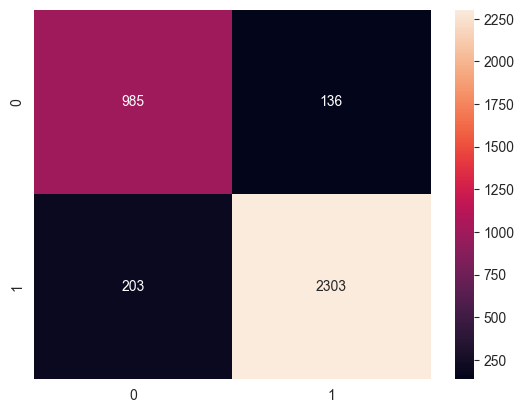

In [19]:
model = RandomForestClassifier(n_estimators=300, criterion='entropy', bootstrap=False,random_state=10)
y_pred = train_model(model, X_train, X_test, y_train)
val_model(y_pred, y_test)

## Predict Using Your Input

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Read the dataset
hotel = pd.read_csv('Hotel Reservations.csv')

# Inspect dataset for non-numeric columns or unexpected values
print(hotel.dtypes)  # Check the data types of each column
print()

# Drop the 'id' and 'Booking_ID' columns (if they exist)
columns_to_drop = ['id', 'Booking_ID']  # Add any other unnecessary columns here
hotel = hotel.drop(columns=[col for col in columns_to_drop if col in hotel.columns])

# Initialize LabelEncoder for categorical features
le_type_of_meal_plan = LabelEncoder()
le_room_type_reserved = LabelEncoder()
le_market_segment_type = LabelEncoder()
le_booking_status = LabelEncoder()  # Separate encoder for target variable

# Encode categorical columns for the entire dataset
hotel['type_of_meal_plan'] = le_type_of_meal_plan.fit_transform(hotel['type_of_meal_plan'])
hotel['room_type_reserved'] = le_room_type_reserved.fit_transform(hotel['room_type_reserved'])
hotel['market_segment_type'] = le_market_segment_type.fit_transform(hotel['market_segment_type'])
hotel['booking_status'] = le_booking_status.fit_transform(hotel['booking_status'])  # Use separate encoder for target

# Check for any unexpected string values or missing data
hotel = hotel.apply(pd.to_numeric, errors='coerce')  # Convert non-numeric columns to NaN
hotel = hotel.fillna(0)  # Handle missing values by filling with zeros (or use other imputation methods)

# Split into features (X) and target (y)
X = hotel.drop('booking_status', axis=1)  # Features
y = hotel['booking_status']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Scale numerical features (standardizing the features)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Print unique categories for the categorical features
print("Unique Meal Plans:", le_type_of_meal_plan.classes_)
print("Unique Room Types:", le_room_type_reserved.classes_)
print("Unique Market Segments:", le_market_segment_type.classes_)
print()

# New input for prediction (ensure all feature values are consistent with the dataset)
new_input = {
    'no_of_adults': 2,
    'no_of_children': 1,
    'no_of_weekend_nights': 1,
    'no_of_week_nights': 3,
    'type_of_meal_plan': 'Meal Plan 1',  # Ensure that this value is part of the training labels
    'required_car_parking_space': 0,
    'room_type_reserved': 'Room_Type 1',  # Ensure that this value is part of the training labels
    'lead_time': 150,
    'arrival_year': 2018,
    'arrival_month': 7,
    'arrival_date': 15,
    'market_segment_type': 'Online',  # Ensure this value is part of the training labels
    'repeated_guest': 0,
    'no_of_previous_cancellations': 0,
    'no_of_previous_bookings_not_canceled': 1,
    'avg_price_per_room': 85.0,
    'no_of_special_requests': 1
}

# Convert the new input to a DataFrame
new_input_df = pd.DataFrame([new_input])

# Drop any unnecessary columns from the new input if needed (such as 'id', 'Booking_ID')
new_input_df = new_input_df.drop(columns=[col for col in columns_to_drop if col in new_input_df.columns])

# Ensure the new input is transformed using the same encoders as the training data
new_input_df['type_of_meal_plan'] = le_type_of_meal_plan.transform(new_input_df['type_of_meal_plan'])
new_input_df['room_type_reserved'] = le_room_type_reserved.transform(new_input_df['room_type_reserved'])
new_input_df['market_segment_type'] = le_market_segment_type.transform(new_input_df['market_segment_type'])

# Scale the new input features
new_input_scaled = scaler.transform(new_input_df)

# Convert scaled data back to a DataFrame with the correct column names
new_input_scaled_df = pd.DataFrame(new_input_scaled, columns=X.columns)

# Make a prediction using the trained RandomForest model
prediction = model.predict(new_input_scaled_df)

# Output the prediction: 1 means 'Not Canceled', 0 means 'Canceled'
print("Prediction (1: Not Canceled, 0: Canceled):", prediction[0])

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

Unique Meal Plans: ['Meal Plan 1' 'Meal Plan 2' 'Meal Plan 3' 'Not Select